In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [3]:
#source: https://towardsdatascience.com/fourier-transformation-for-a-data-scientist-1f3731115097

C:\Users\risto\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


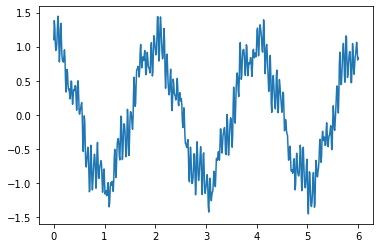

In [6]:
# Number of samplepoints
N = 600
sample_rate=100.0
# sample spacing - inverse of sample rate
T = 1.0 / sample_rate
x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
y=np.cos(2*np.pi*0.5*x) + 0.2*np.sin(2*np.pi*2.5*x+0.1) + \
        0.2*np.sin(2*np.pi*15.3*x) + 0.1*np.sin(2*np.pi*16.7*x + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*x+.8)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.plot(x, y)

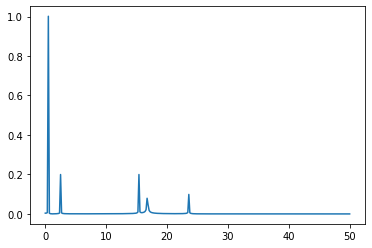

In [7]:
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

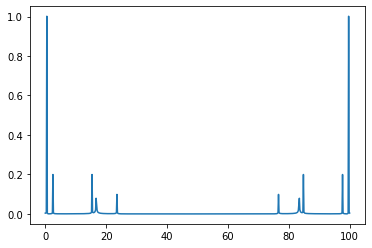

In [8]:
#if you don't take just half
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(T), N)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf))
plt.show()

## My example on windowing

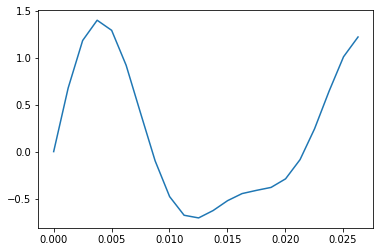

In [9]:
# Number of samplepoints
N = 600
# sample spacing - inverse of sample rate
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
#take subset of original wave
n_sub=22
x=x[:n_sub]
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)


yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), n_sub)

plt.plot(x, y)

In [10]:
len(xf), len(yf)

(22, 22)

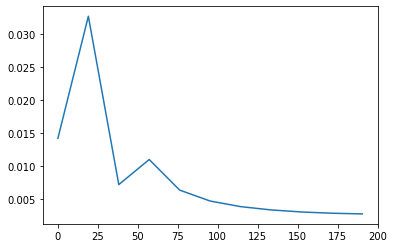

In [11]:
fig, ax = plt.subplots()
ax.plot(xf[:n_sub//2], 2.0/N * np.abs(yf[:n_sub//2]))
plt.show()

#### add window

In [42]:
nyq_rate = sample_rate / 2.0
nyq_rate

400.0

In [43]:
width = 5.0/nyq_rate
width

0.0125

In [45]:
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

from scipy.signal import kaiserord
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)